In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans


In [20]:
df=pd.read_csv(r"C:\Users\Abdelrahman\OneDrive\Documents\Project DM\train.csv")
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,5/13/2015 23:53,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,5/13/2015 23:53,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,5/13/2015 23:33,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,5/13/2015 23:30,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,5/13/2015 23:30,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [22]:
df.describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


In [25]:
df = df[df['Resolution'] != 'None']

In [42]:
print(X[['Day', 'Month']].isnull().sum())
print(df['Cluster'].isnull().sum())

Day      0
Month    0
dtype: int64
0


In [ ]:
df.dropna(inplace=True)

df['Dates'] = pd.to_datetime(df['Dates'])

# بيحول النص لارقام عشواءي
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])  

print(df.dtypes)

Dates         datetime64[ns]
Category               int64
Descript              object
DayOfWeek             object
PdDistrict            object
Resolution            object
Address               object
X                    float64
Y                    float64
dtype: object


In [ ]:
# دول اخرتهم عشان اعمل عليهم التمارين و التيست
features = ['PdDistrict', 'DayOfWeek', 'Dates']  
#في البيانات مكتوب كل حاجة فخترت اني اقسم كل حاجة 
df['Day'] = df['Dates'].dt.day
df['Month'] = df['Dates'].dt.month
df['Year'] = df['Dates'].dt.year
df['Hour'] = df['Dates'].dt.hour

# ترميز الأعمدة النصية
df['PdDistrict'] = le.fit_transform(df['PdDistrict'])
df['DayOfWeek'] = le.fit_transform(df['DayOfWeek'])

X = df[['PdDistrict', 'DayOfWeek', 'Day', 'Month', 'Year','Hour']]
y = df['Category']

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
#المكتبات الخاصة بيها
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# تدريب النموذج
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# التنبؤ
y_pred_log = log_model.predict(X_test)

# تقييم النموذج
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

c:\Users\Abdelrahman\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


c:\Users\Abdelrahman\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Abdelrahman\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       456
           1       0.00      0.00      0.00     23097
           2       0.00      0.00      0.00       113
           3       0.00      0.00      0.00        90
           4       0.00      0.00      0.00     11049
           5       0.00      0.00      0.00      1241
           6       0.00      0.00      0.00       707
           7       0.00      0.00      0.00     16237
           8       0.00      0.00      0.00      1272
           9       0.00      0.00      0.00       346
          10       0.00      0.00      0.00        71
          11       0.00      0.00      0.00       132
          12       0.00      0.00      0.00      3135
          13       0.00      0.00      0.00      4859
          14       0.00      0.00      0.00        48
          15       0.00      0.00      0.00       670
          16       0.20      0.99      0.33     52641
          17       0.00    

c:\Users\Abdelrahman\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [31]:
#طريقة للتنقيب
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
df['Cluster'] = kmeans.labels_

In [40]:
from sklearn.metrics import silhouette_samples

# عدد العينات اللي عايز تحللها
sample_size = 30

# نحاول نختار عينة فيها أكثر من كلستر
while True:
    indices = np.random.choice(len(X), size=sample_size, replace=False)
    sample_X = X.iloc[indices]  # تعديل هنا
    sample_labels = kmeans.labels_[indices]

    if len(np.unique(sample_labels)) > 1:
        break  

# نحسب السيلويت للعينة
silhouette_vals = silhouette_samples(sample_X, sample_labels)

print("Silhouette scores for random sample of 30 points:")
print(silhouette_vals)

Silhouette scores for random sample of 30 points:
[ 0.38726278  0.39236103  0.13920708  0.1504202   0.36361082  0.43588008
  0.33083809  0.14043897  0.0789738   0.04082212  0.34814075 -0.0100168
  0.16387589 -0.11078603  0.26653797  0.34910628  0.27193736  0.2860353
  0.28842706  0.0227088   0.28818333  0.09224689  0.230473    0.38133646
  0.18399725  0.45035353 -0.06865819  0.39010214  0.35377312  0.38241527]


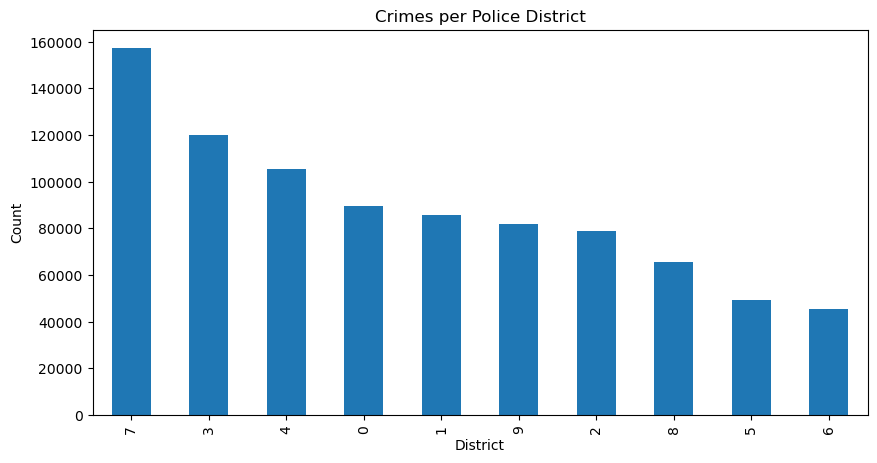

In [35]:
# توزيع الجرائم حسب المناطق
plt.figure(figsize=(10, 5))
df['PdDistrict'].value_counts().plot(kind='bar')
plt.title('Crimes per Police District')
plt.xlabel('District')
plt.ylabel('Count')
plt.show()

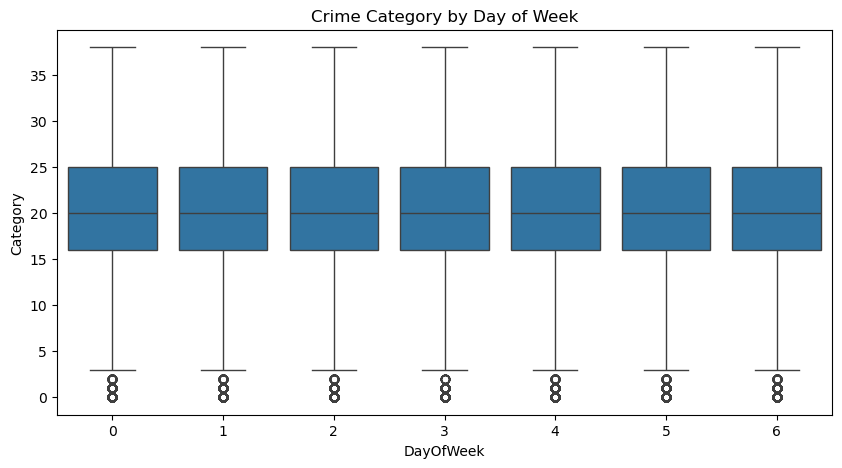

In [36]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='DayOfWeek', y='Category', data=df)
plt.title('Crime Category by Day of Week')
plt.show()

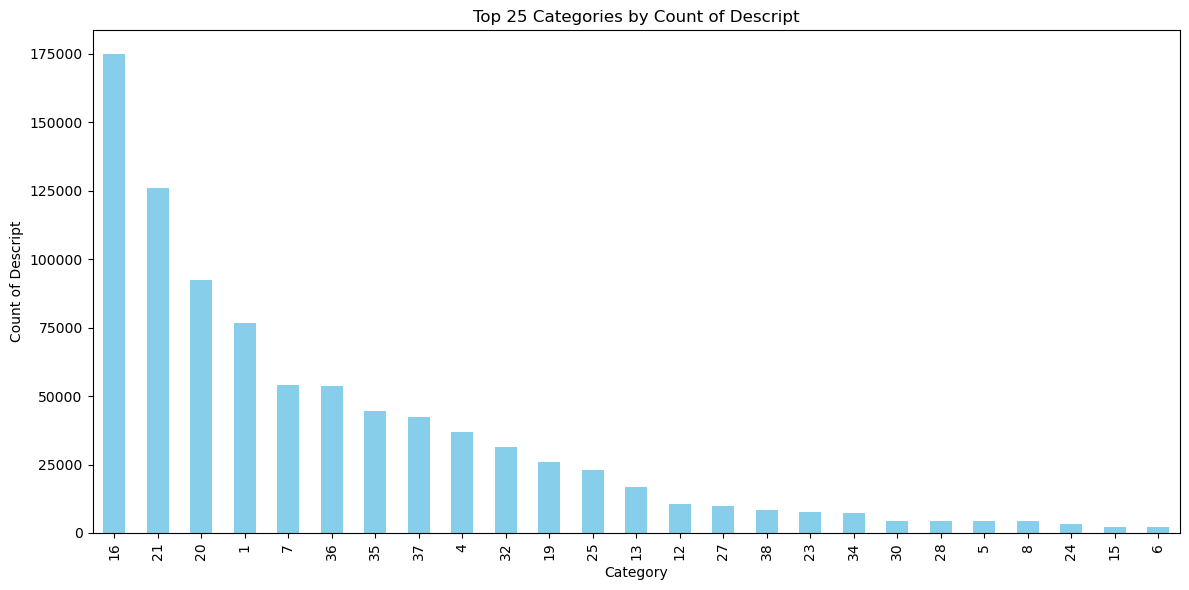

In [ ]:
plt.figure(figsize=(12, 6))
subset = df[['Category', 'Descript']]
subset.groupby('Category')['Descript'].count().sort_values(ascending=False).head(25).plot(kind='bar', color='skyblue')
plt.title('Top 25 Categories by Count of Descript')
plt.xlabel('Category')
plt.ylabel('Count of Descript')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
